### Description

This code is used to create the figure of the model extents used in the dissertation.

2 Files are required for this plot:
1. `agu_hycom.nc`
2. `india_hycom.nc`
These files can be arbritrary in time, but will require lats and lons and a field to plot—in this case, SSH is plotted.

These files have been created on Fram from binary using the `m2nc` routine on weekly averages. In the case of this code, weekly averages were taken for 2008_12_3.[ab]. 

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr

In [8]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [9]:
india = xr.open_dataset('../Data/india_hycom.nc')
agu = xr.open_dataset('../Data/agu_hycom.nc')

In [4]:
india['ssh00'][0]

<xarray.DataArray 'ssh00' (jdim: 590, idim: 400)>
[236000 values with dtype=float32]
Dimensions without coordinates: jdim, idim

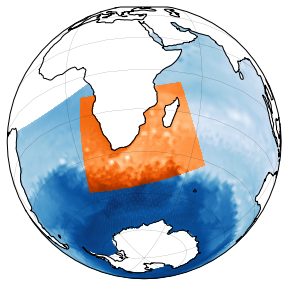

<Figure size 432x288 with 0 Axes>

In [11]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.pcolormesh(india['longitude'], india['latitude'], india['ssh00'][0], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Blues_r'), alpha=0.5)
img2 = plt.pcolormesh(agu['longitude'], agu['latitude'], agu['ssh00'][0], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Oranges_r'))
ax.set_title('')
plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()